Files already downloaded and verified
Files already downloaded and verified
Image Shape torch.Size([128, 3, 32, 32])
Label Shape torch.Size([128])
[saab]  Training
[saab]  Input Shape: torch.Size([128, 3, 32, 32])
[saab]  Starting Saab Transform
[saab]  Patches Shape: torch.Size([12800, 27])
[saab]  Saab Transform Complete
[saab]  Output Shape: torch.Size([128, 27, 32, 32])
Explained Variance Ratio: 
tensor([7.8713e-01, 6.3597e-02, 5.4836e-02, 4.3471e-02, 1.1425e-02, 1.0138e-02,
        9.2995e-03, 7.4112e-03, 2.6663e-03, 2.4693e-03, 2.4249e-03, 1.8370e-03,
        7.1275e-04, 5.9813e-04, 5.1797e-04, 3.7545e-04, 3.2481e-04, 2.7354e-04,
        1.1559e-04, 9.1003e-05, 8.0169e-05, 7.5927e-05, 6.1089e-05, 2.6036e-05,
        2.0008e-05, 1.7325e-05, 6.7771e-06])
Output Shape torch.Size([128, 27, 32, 32])


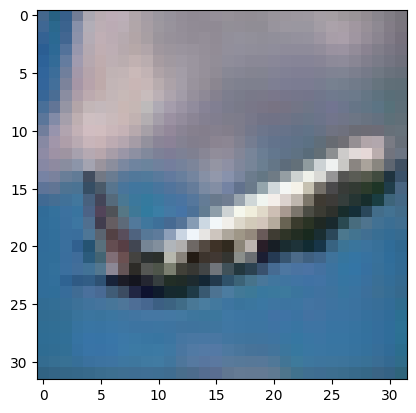

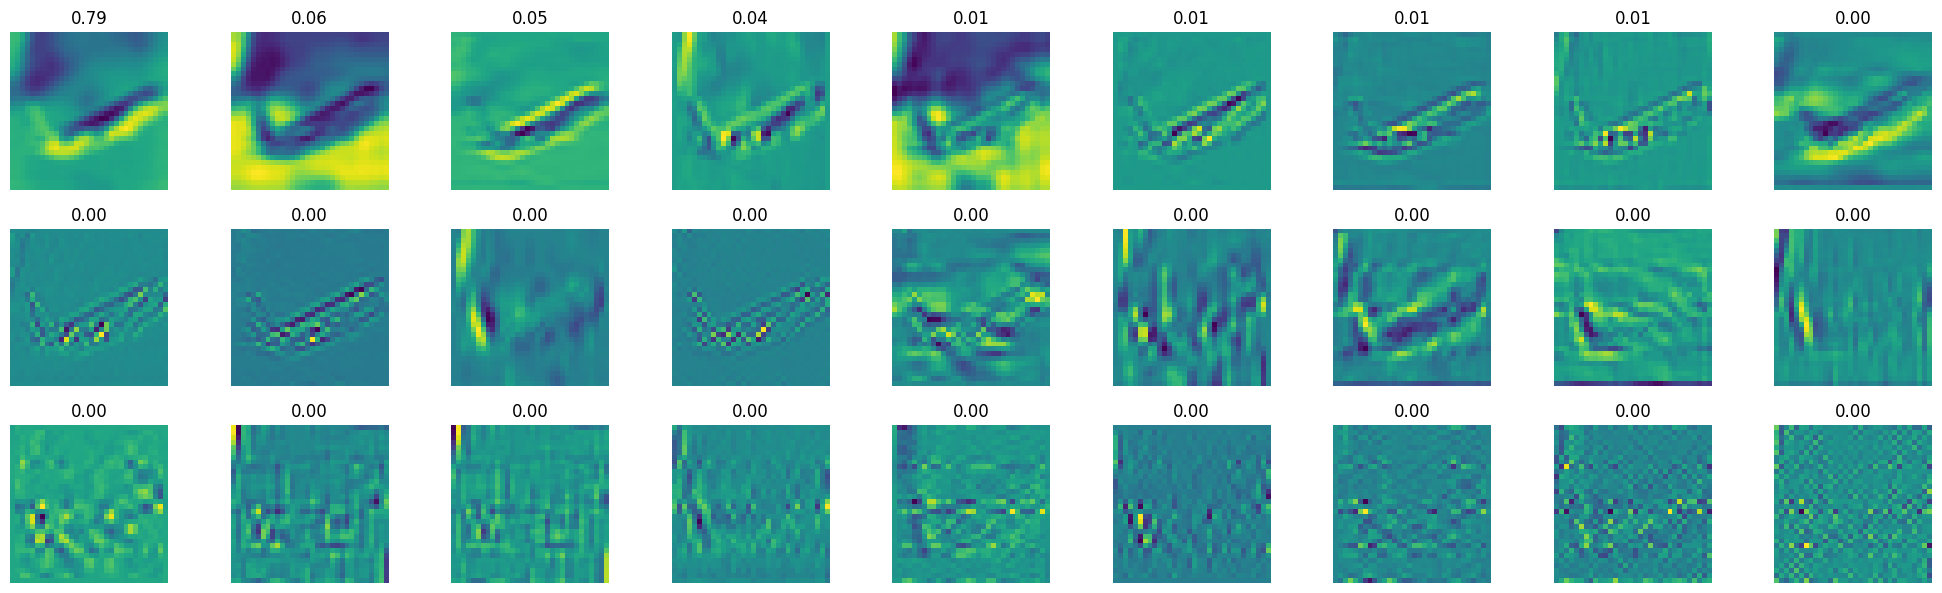

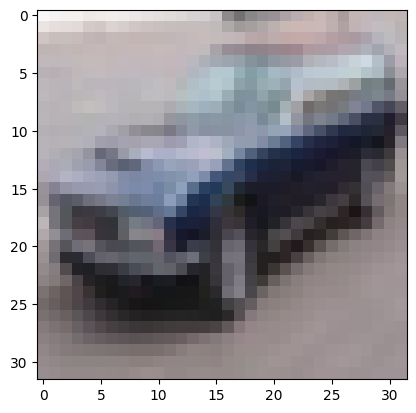

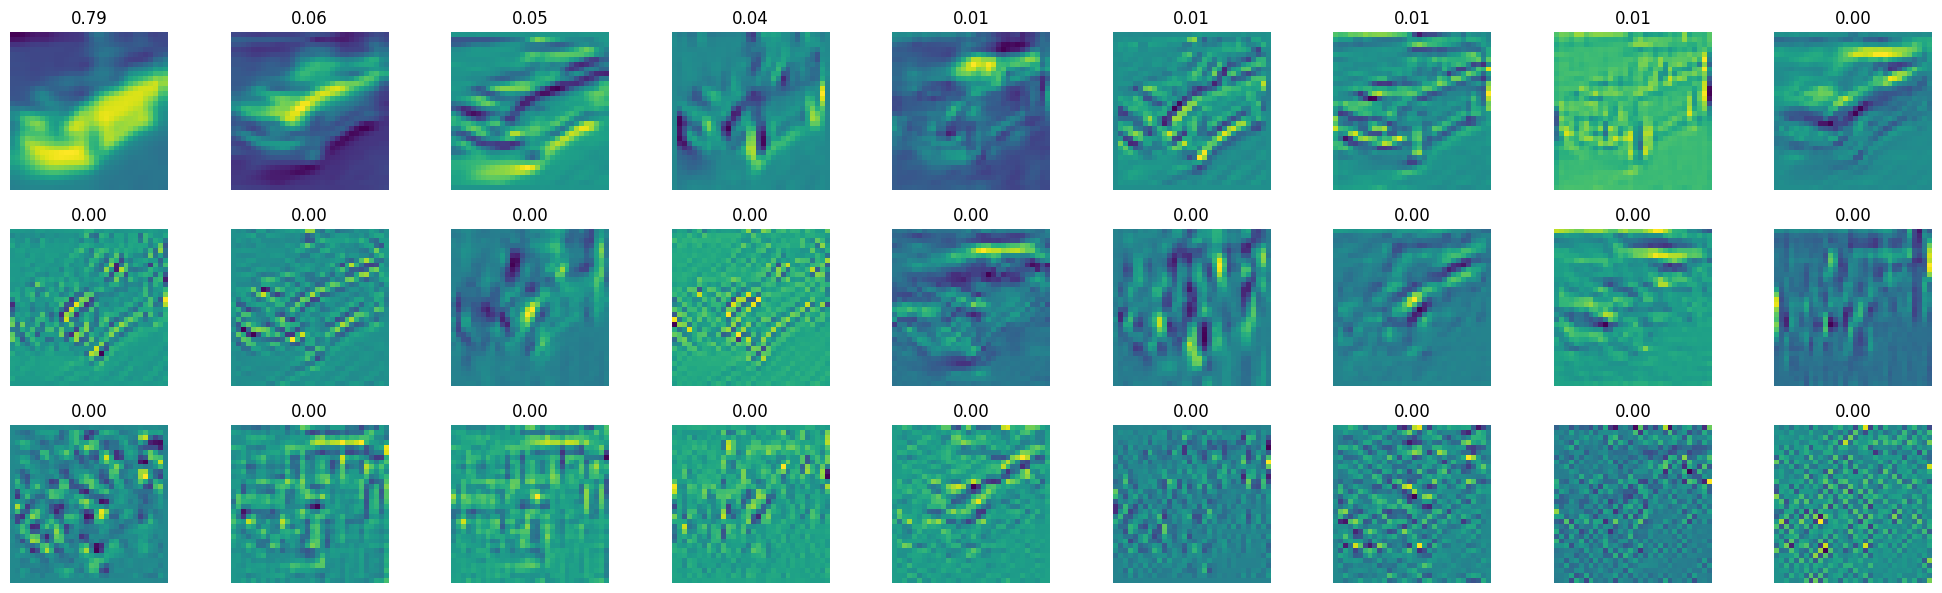

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from greenlab.conv2d_pca import Conv2d_PCA

torch.manual_seed(2025)

# Define transformations to apply to the data
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

images, labels = next(iter(trainloader))
print("Image Shape", images.shape)
print("Label Shape", labels.shape)

# Saab Transform
# max_patches_per_image=100 is used to save memory
# we randomly sample 100 patches from each image
conv = Conv2d_PCA(in_channels=3, out_channels=27, kernel_size=3, 
                  stride=1, padding=1, mode="saab", max_patches_per_image=100)
output = conv(images)
print("Explained Variance Ratio: ")
print(conv.explained_variance_ratio_)
print("Output Shape", output.shape)
plt.imshow(images[0].permute(1, 2, 0).detach().numpy())
plt.show()

plt.figure(figsize=(20, 8))
for i in range(27):
    plt.subplot(4, 9, i + 1)
    plt.imshow(output[0, i].detach().numpy())
    plt.tight_layout()
    plt.title(f"{conv.explained_variance_ratio_[i]:.2f}")
    plt.axis("off")
plt.show()

plt.imshow(images[1].permute(1, 2, 0).detach().numpy())
plt.show()

plt.figure(figsize=(20, 8))
for i in range(27):
    plt.subplot(4, 9, i + 1)
    plt.imshow(output[1, i].detach().numpy())
    plt.tight_layout()
    plt.title(f"{conv.explained_variance_ratio_[i]:.2f}")
    plt.axis("off")
plt.show()


In [2]:
from greenlab.pixelhop import PixelHopPlusPlus

In [3]:
num_channels=[
    12,  # Hop 1
    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],  # Hop 2
    [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],  # Hop 3
    [
        [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],
        [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],
        [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],
        [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],
        [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],
        [[4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4]],
    ], 
]

In [4]:
model = PixelHopPlusPlus(num_channels)
# train the model (first pass) only support cpu training
hop1_feat, hop2_feat, hop3_feat, hop4_feat = model(images)

[hop1]  Training
[hop1]  Input Shape: torch.Size([128, 3, 32, 32])
[hop1]  Starting Saab Transform
[hop1]  Patches Shape: torch.Size([12800, 12])
[hop1]  Saab Transform Complete
[hop1]  Output Shape: torch.Size([128, 12, 16, 16])
[hop2_hop1_ch0]  Training
[hop2_hop1_ch0]  Input Shape: torch.Size([128, 1, 16, 16])
[hop2_hop1_ch0]  Starting Saab Transform
[hop2_hop1_ch0]  Patches Shape: torch.Size([8192, 4])
[hop2_hop1_ch0]  Saab Transform Complete
[hop2_hop1_ch0]  Output Shape: torch.Size([128, 4, 8, 8])
[hop2_hop1_ch1]  Training
[hop2_hop1_ch1]  Input Shape: torch.Size([128, 1, 16, 16])
[hop2_hop1_ch1]  Starting Saab Transform
[hop2_hop1_ch1]  Patches Shape: torch.Size([8192, 4])
[hop2_hop1_ch1]  Saab Transform Complete
[hop2_hop1_ch1]  Output Shape: torch.Size([128, 4, 8, 8])
[hop2_hop1_ch2]  Training
[hop2_hop1_ch2]  Input Shape: torch.Size([128, 1, 16, 16])
[hop2_hop1_ch2]  Starting Saab Transform
[hop2_hop1_ch2]  Patches Shape: torch.Size([8192, 4])
[hop2_hop1_ch2]  Saab Transform 

In [ ]:
inv_output1 = model.inverse1(hop1_feat)
inv_output2 = model.inverse2(hop2_feat)
inv_output3 = model.inverse3(hop3_feat)
inv_output4 = model.inverse4(hop4_feat)
print("error", torch.mean(torch.abs(inv_output1 - images)))
print("error", torch.mean(torch.abs(inv_output2 - images)))
print("error", torch.mean(torch.abs(inv_output3 - images)))
print("error", torch.mean(torch.abs(inv_output4 - images)))

In [ ]:
plt.imshow(images[0].permute(1, 2, 0).numpy())
plt.colorbar()
plt.title("Original Image")
plt.show()
plt.imshow(inv_output1[0].permute(1, 2, 0).numpy())
plt.colorbar()
plt.title("Reconstructed Image from Hop 1")
plt.show()
plt.imshow(inv_output2[0].permute(1, 2, 0).numpy())
plt.colorbar()
plt.title("Reconstructed Image from Hop 2")
plt.show()
plt.imshow(inv_output3[0].permute(1, 2, 0).numpy())
plt.colorbar()
plt.title("Reconstructed Image from Hop 3")
plt.show()
plt.imshow(inv_output4[0].permute(1, 2, 0).numpy())
plt.colorbar()
plt.title("Reconstructed Image from Hop 4")
plt.show()

In [ ]:
# inference by gpu (seoncd pass)
if torch.cuda.is_available():
    model = model.cuda()
    hop1_feat, hop2_feat, hop3_feat, hop4_feat = model(images.cuda())
else: # inference by cpu (seoncd pass)
    hop1_feat, hop2_feat, hop3_feat, hop4_feat = model(images)

In [ ]:
feat1, eng1, names1 = model.concat(hop1_feat, model.eng1) # type: ignore
feat1 = feat1.cpu()
feat2, eng2, names2 = model.concat(hop2_feat, model.eng2) # type: ignore
feat2 = feat2.cpu()
feat3, eng3, names3 = model.concat(hop3_feat, model.eng3) # type: ignore
feat3 = feat3.cpu()
feat4, eng4, names4 = model.concat(hop4_feat, model.eng4) # type: ignore
feat4 = feat4.cpu()

In [ ]:
plt.figure(figsize=(16, 8))

for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(feat1[0, i, :, :].numpy())
    plt.tight_layout()
    # plt.title('%f' % (labelhop.conv1.explained_variance_ratio_[i].item()))
    plt.title('%s\n%f' % (names1[i], eng1[i].item()))
    plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))

for i in range(len(names2)):
    plt.subplot(4, 8, i+1)
    plt.imshow(feat2[0, i, :, :].numpy())
    plt.tight_layout()
    # plt.title('%f' % (labelhop.conv2.explained_variance_ratio_[i].item()))
    plt.title('%s\n%f' % (names2[i], eng2[i].item()))
    plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(16, 16))

for i in range(len(names3)):
    plt.subplot(9, 8, i+1)
    plt.imshow(feat3[0, i, :, :].numpy())
    # plt.title('%f' % (labelhop.conv3.explained_variance_ratio_[i].item()))
    plt.title('%s\n%f' % (names3[i], eng3[i].item()))
    plt.tight_layout()
    plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(16, 64))

for i in range(len(names4)):
    plt.subplot(32, 8, i+1)
    plt.imshow(feat4[0, i, :, :].numpy())
    # plt.title('%f' % (labelhop.conv3.explained_variance_ratio_[i].item()))
    plt.title('%s\n%f' % (names4[i], eng4[i].item()))
    plt.tight_layout()
    plt.axis('off')
plt.show()

In [ ]:
from greenlab.dft import DiscriminantFeatureTest
num_feat = 4000

In [ ]:
print(feat1.shape, feat2.shape, feat3.shape, feat4.shape)
feat1 = feat1.view(feat1.shape[0], -1)
feat2 = feat2.view(feat2.shape[0], -1)
feat3 = feat3.view(feat3.shape[0], -1)
feat4 = feat4.view(feat4.shape[0], -1)
feat = torch.cat([feat1, feat2, feat3, feat4], dim=1)
print(feat.shape)
dft = DiscriminantFeatureTest()
dft.fit(feat, labels)
dft.plot_loss()
dft.plot_loss(sorted=True)
selected_feat = dft.select(feat, num_feat) # select features

In [ ]:
from tqdm import tqdm
# get features
X_train = []
y_train = []
for data in tqdm(trainloader):
    images, labels = data
    if torch.cuda.is_available():
        images = images.cuda()
    hop1_feat, hop2_feat, hop3_feat, hop4_feat = model(images)
    feat1 = model.concat(hop1_feat, model.eng1)[0] # type: ignore
    feat2 = model.concat(hop2_feat, model.eng2)[0] # type: ignore
    feat3 = model.concat(hop3_feat, model.eng3)[0] # type: ignore
    feat4 = model.concat(hop4_feat, model.eng4)[0] # type: ignore
    feat1 = feat1.view(feat1.shape[0], -1)
    feat2 = feat2.view(feat2.shape[0], -1)
    feat3 = feat3.view(feat3.shape[0], -1)
    feat4 = feat4.view(feat4.shape[0], -1)
    feat = torch.cat([feat1, feat2, feat3, feat4], dim=1)
    selected_feat = dft.select(feat, num_feat) # select features
    selected_feat = selected_feat.cpu()
    X_train.append(selected_feat)
    y_train.append(labels)
X_train = torch.cat(X_train, dim=0)
y_train = torch.cat(y_train, dim=0)

X_val = []
y_val = []
for data in tqdm(testloader): # should be valloader, but testloader is used for demo
    images, labels = data
    if torch.cuda.is_available():
        images = images.cuda()
    hop1_feat, hop2_feat, hop3_feat, hop4_feat = model(images)
    feat1 = model.concat(hop1_feat, model.eng1)[0] # type: ignore
    feat2 = model.concat(hop2_feat, model.eng2)[0] # type: ignore
    feat3 = model.concat(hop3_feat, model.eng3)[0] # type: ignore
    feat4 = model.concat(hop4_feat, model.eng4)[0] # type: ignore
    feat1 = feat1.view(feat1.shape[0], -1)
    feat2 = feat2.view(feat2.shape[0], -1)
    feat3 = feat3.view(feat3.shape[0], -1)
    feat4 = feat4.view(feat4.shape[0], -1)
    feat = torch.cat([feat1, feat2, feat3, feat4], dim=1)
    selected_feat = dft.select(feat, num_feat) # select features
    selected_feat = selected_feat.cpu()
    X_val.append(selected_feat)
    y_val.append(labels)
X_val = torch.cat(X_val, dim=0)
y_val = torch.cat(y_val, dim=0)

In [ ]:
import xgboost as xgb

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)
X_train = X_train.numpy()
X_val = X_val.numpy()
DMatrix_train, DMatrix_val = xgb.DMatrix(X_train, label=y_train), xgb.DMatrix(X_val, label=y_val)
del X_train, X_val

In [ ]:
params = {
    'tree_method': 'gpu_hist',
    'objective': 'multi:softmax',
    'eval_metric': ['merror'],
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 0,
    # 'verbosity': 3,
    'num_class': 10,
}
num_boost_round = 10000
early_stopping_rounds = 10

evals_result = {}
watchlist = [(DMatrix_train, 'train'), (DMatrix_val, 'val')]
bst = xgb.train(params, DMatrix_train, num_boost_round, 
                evals=watchlist, early_stopping_rounds=early_stopping_rounds,
                evals_result=evals_result, verbose_eval=True)

In [ ]:
iteration_range = (0, bst.best_iteration+1)
pred = bst.predict(DMatrix_val, iteration_range=iteration_range)
print('accuracy: %f' % (np.sum(pred == y_val.numpy()) / len(y_val)))

In [ ]:
# This is a toy example, if you want to improve the performance, you can try:
# 1. enlarge the kernel size from 2 to 5
# 2. use max pooling instead of strided convolution
# 3. use deeper tree
# Modify PixelHop.py to implement these changes